### Matplotlib
- test plot 
- import numpy and matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from grid import Grid 

2 ways: Draw grids => plt. or ax.

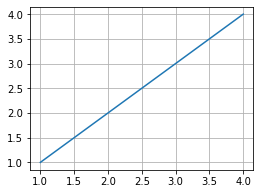

In [43]:
fig = plt.figure(num=1, figsize=(4,3))
ax = fig.add_subplot(111)
ax.plot([1,2,3,4],[1,2,3,4])
plt.grid()
plt.show()

[0.  0.2 0.4 0.6 0.8]
[0.  0.1 0.2 0.3]
[0.  0.2 0.4 0.6]
[0.2 0.1 0. ]
lst_grids check length
12
1 is place_q
(0.0, 0.2)
The neighbor grids are : [5, 2]
2 is place_v
(0.2, 0.2)
The neighbor grids are : [6, 1, 3]
3 is place_p
(0.4, 0.2)
The neighbor grids are : [7, 2, 4]
4 is number
(0.6, 0.2)
The neighbor grids are : [8, 3]
5 is place_v
(0.0, 0.1)
The neighbor grids are : [1, 9, 6]
6 is number
(0.2, 0.1)
The neighbor grids are : [2, 10, 5, 7]
7 is place_q
(0.4, 0.1)
The neighbor grids are : [3, 11, 6, 8]
8 is number
(0.6, 0.1)
The neighbor grids are : [4, 12, 7]
9 is place_p
(0.0, 0.0)
The neighbor grids are : [5, 10]
10 is place_q
(0.2, 0.0)
The neighbor grids are : [6, 9, 11]
11 is place_v
(0.4, 0.0)
The neighbor grids are : [7, 10, 12]
12 is place_v
(0.6, 0.0)
The neighbor grids are : [8, 11]
[6, 1, 3]


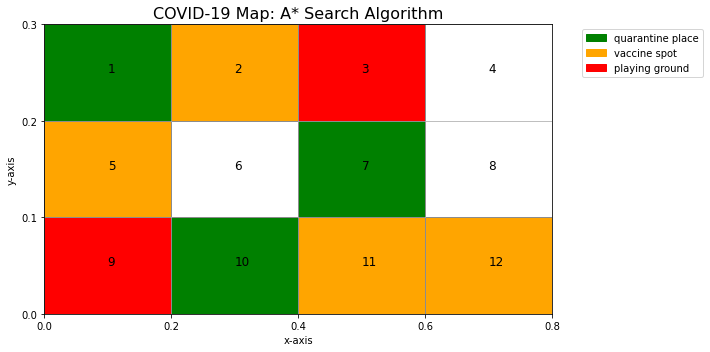

In [8]:
fig, ax= plt.subplots(figsize=(10,5)) # set a 5X10 Canvas

offset_y = 0.1 #for width * length = 0.1*0.2
offset_x = 0.2
row = 3
column = 4
ylim = row*offset_y
xlim = column*offset_x
# set the axis range
ax.set_xlim(0,xlim)
ax.set_ylim(0,ylim)

# create the scales of the axis
x_arr = np.linspace(0, xlim, column+1)
y_arr = np.linspace(0, ylim, row+1)

# test the values of X and Y axis
print(x_arr)
print(y_arr)

#set axis scales
ax.set_xticks(x_arr)
ax.set_yticks(y_arr)

# set title and axis-lables
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_title("COVID-19 Map: A* Search Algorithm", fontsize=16, color='black', verticalalignment="baseline")

# set each grid's bottom-point for draw Rectangle
num_grids = row*column
x_rect_ptr_arr = np.round(x_arr[0:-1],1) # keep 0.1f
y_rect_ptr_arr = np.round(y_arr[0:-1],1)
# reverse y_rect_ptr_arr
y_rect_ptr_arr = np.flip(y_rect_ptr_arr)
print(x_rect_ptr_arr)
print(y_rect_ptr_arr)

lst_grids = []
n=1
# assign each grid's bottom-point
for yi in y_rect_ptr_arr:
    for xi in x_rect_ptr_arr:
#         print(xi, yi)
        lst_grids.append(Grid(xi,yi,n,row,column))
        n += 1

# for item in lst_grids:
#     print(item.get_grid_num())
#     print(item.get_bot_ptr())
print("lst_grids check length")
print(len(lst_grids))

q_arr = [1,7,10]
v_arr = [2,5,11,12]
p_arr = [3,9]

# set each grid's type
for qi in q_arr:
    lst_grids[qi-1].set_type("place_q")
    
for vi in v_arr:
    lst_grids[vi-1].set_type("place_v")
    
for pi in p_arr:
    lst_grids[pi-1].set_type("place_p")  
    
for item in lst_grids:
    print(str(item.get_grid_num()) + " is " + str(item.get_type()))   
    print(item.get_bot_ptr())
    print("The neighbor grids are : " + str(item.get_neighbors_num()))

    
print(lst_grids[1].get_neighbors_num())

# set 3 types for each grid by user: 
# place_q(color:green): quarantine place, place_v(color: orange):vaccine spot, place_p(color: blue): playing ground


#set different color for each grid
# use Rectangle to draw each grid, xy is the bottom-left point of each grid
for item in lst_grids:
    if item.get_type() == "place_q":
        rect = mpatches.Rectangle(item.get_bot_ptr(), offset_x, offset_y, edgecolor="black", facecolor="g")
        ax.add_patch(rect)
    elif item.get_type() == "place_v":
        rect = mpatches.Rectangle(item.get_bot_ptr(), offset_x, offset_y, edgecolor="black", facecolor="orange")
        ax.add_patch(rect)
    elif item.get_type() == "place_p":
        rect = mpatches.Rectangle(item.get_bot_ptr(), offset_x, offset_y, edgecolor="black", facecolor="r")
        ax.add_patch(rect)
    else: 
        pass
    # add text in map for grid's number
    ax.text(item.x + offset_x/2,item.y+offset_y/2,str(item.get_grid_num()), fontsize=12, color="k", alpha=1)
    
    
# set legend
patch_q = mpatches.Patch(color='green', label='quarantine place')
patch_v = mpatches.Patch(color='orange', label='vaccine spot')
patch_p = mpatches.Patch(color='red', label='playing ground')
plt.legend(handles=[patch_q, patch_v, patch_p], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()


ax.grid(True)
plt.show()

Using gridspec